In [24]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

# dimensions of our images.
img_width, img_height = 299, 299

train_data_dir = 'C:\\Users\\DELL 5540\\OneDrive\Desktop\\Breast-Cancer\\Breast_Cancer_Event_Dataset\\TRAIN' #location of training data
validation_data_dir = 'C:\\Users\\DELL 5540\\OneDrive\\Desktop\\Breast-Cancer\\Breast_Cancer_Event_Dataset\\VAL' #location of validation data

# number of samples used for determining the samples_per_epoch
nb_train_samples = 65
nb_validation_samples = 10
epochs = 30
batch_size = 5  

train_datagen = ImageDataGenerator(
        rescale=1./255,            # normalize pixel values to [0,1]
        shear_range=0.2,      
        zoom_range=0.2,    
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)  


val_datagen = ImageDataGenerator(
         rescale=1./255)       # normalize pixel values to [0,1]

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 65 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [25]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [26]:
model_top = Sequential()
model_top.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:], data_format=None)),  
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid')) 

model = Model(inputs=base_model.input, outputs=model_top(base_model.output))

model.compile(optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [27]:
history = model.fit(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)


Epoch 1/30
13/13 [==============================] - 63s 2s/step - loss: 0.7954 - accuracy: 0.5077 - val_loss: 0.7473 - val_accuracy: 0.5000
Epoch 2/30
13/13 [==============================] - 27s 2s/step - loss: 0.6702 - accuracy: 0.6154 - val_loss: 0.8314 - val_accuracy: 0.5000
Epoch 3/30
13/13 [==============================] - 26s 2s/step - loss: 0.6173 - accuracy: 0.6462 - val_loss: 1.0475 - val_accuracy: 0.3000
Epoch 4/30
13/13 [==============================] - 25s 2s/step - loss: 0.6400 - accuracy: 0.7077 - val_loss: 0.7520 - val_accuracy: 0.5000
Epoch 5/30
13/13 [==============================] - 27s 2s/step - loss: 0.6329 - accuracy: 0.6769 - val_loss: 0.8770 - val_accuracy: 0.4000
Epoch 6/30
13/13 [==============================] - 27s 2s/step - loss: 0.6421 - accuracy: 0.6154 - val_loss: 0.9389 - val_accuracy: 0.2000
Epoch 7/30
13/13 [==============================] - 26s 2s/step - loss: 0.5510 - accuracy: 0.7692 - val_loss: 0.9959 - val_accuracy: 0.5000
Epoch 8/30
13/13 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


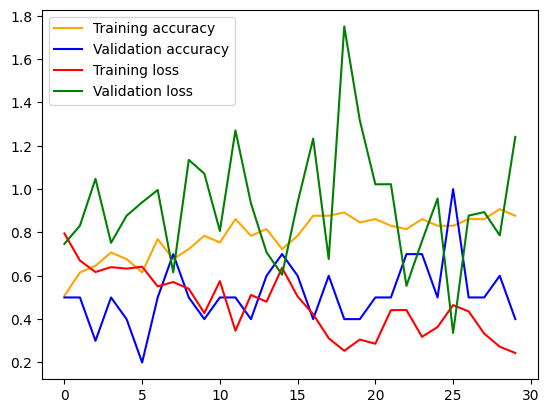

In [28]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()


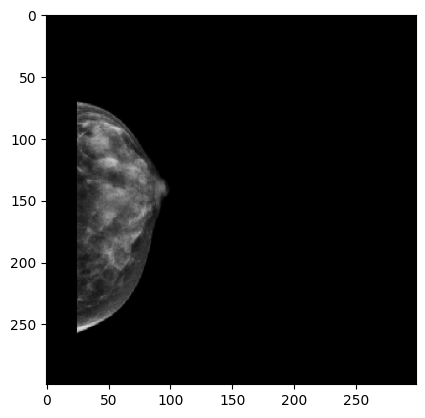

1/1 [==============================] - 2s 2s/step
Predicted: [[0.15614866]] benign


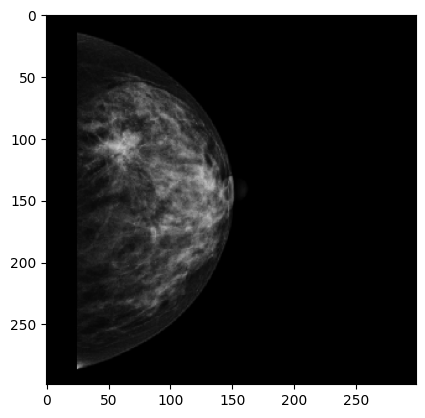

1/1 [==============================] - 0s 85ms/step
Predicted: [[0.84930015]] malignant


In [29]:
import numpy as np
from keras.preprocessing import image

img_path='C:\\Users\\DELL 5540\\OneDrive\\Desktop\\Breast-Cancer\\Breast_Cancer_Event_Dataset\\TEST\\benign.jpg' #change to location of chest x-ray
img_path2='C:\\Users\\DELL 5540\\OneDrive\\Desktop\\Breast-Cancer\\Breast_Cancer_Event_Dataset\TEST\\malignant.jpg'  #change to location of abd x-ray
img = image.load_img(img_path, target_size=(img_width, img_height))
img2 = image.load_img(img_path2, target_size=(img_width, img_height))
plt.imshow(img)
plt.show()

img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'benign' if score < 0.5 else 'malignant')

plt.imshow(img2)
plt.show()

img2 = image.img_to_array(img2)
x = np.expand_dims(img2, axis=0) * 1./255
score2 = model.predict(x)
print('Predicted:', score2, 'benign' if score2 < 0.5 else 'malignant')
